In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

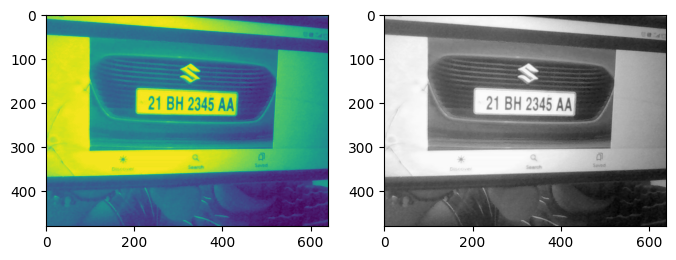

In [9]:
img = cv2.imread(r"data\0.jpg")
img = cv2.flip(img,1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(gray)
ax[1].imshow(rgb)

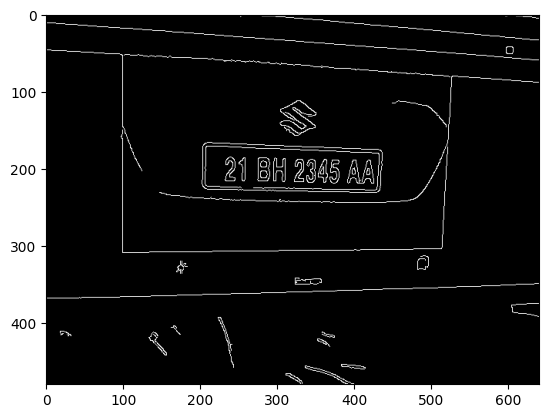

In [10]:
bfilter = cv2.bilateralFilter(gray,11,17,17) #noise reduction
edged = cv2.Canny(bfilter,30,200) #edge detection
edged_rgb = cv2.cvtColor(edged,cv2.COLOR_BGR2RGB)
plt.imshow(edged_rgb)

In [11]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10]

In [12]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break
print(location)
    

[[[203 171]]

 [[209 227]]

 [[434 224]]

 [[431 175]]]


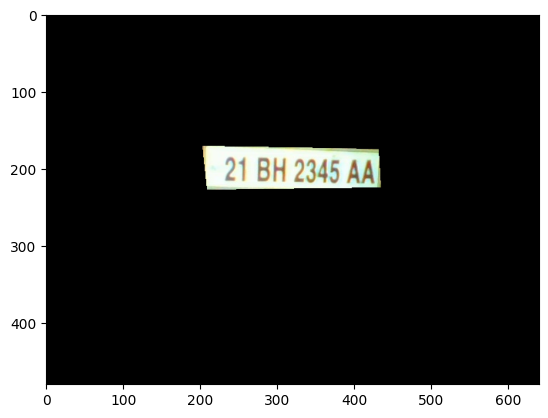

In [13]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

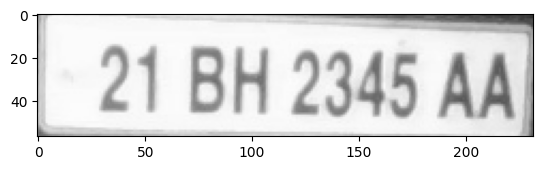

In [14]:
(x,y) = np.where(mask==255)
x1,y1 = np.min(x),np.min(y)
x2,y2 = np.max(x),np.max(y)
cropped_img = gray[x1:x2+1,y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

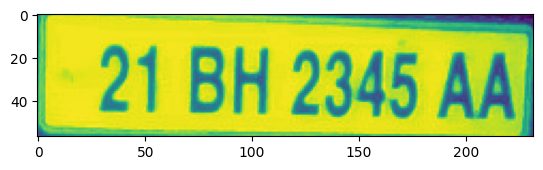

In [15]:
from PIL import ImageEnhance
from PIL import Image
from PIL import ImageFilter
image = Image.fromarray(cropped_img)
image = ImageEnhance.Color(image).enhance(1.25)
image = ImageEnhance.Sharpness(image).enhance(1.5)
plt.imshow(image)

In [22]:
import re
import numpy
import  pytesseract
plate = numpy.array(image)
text = pytesseract.image_to_string(plate)
print(text)
text = re.sub(r'\W+', '', text)

21 BH 2345 AAI



error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'
